# Import the libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Load the dataset 
data = pd.read_excel("HousePricePrediction.xlsx")
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
data.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [5]:
data.shape

(2919, 13)

In [6]:
print("The number of rows", data.shape[0])
print("The number of column", data.shape[1])

The number of rows 2919
The number of column 13


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [8]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [9]:
# Checking the null value 
print("Missing value?", data.isnull().values.any())

Missing value? True


In [10]:
data.isnull().sum().sort_values(ascending=False)

SalePrice       1459
MSZoning           4
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
Id                 0
MSSubClass         0
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
dtype: int64

In [11]:
# Ensure correct data types 
data['YearBuilt'] = pd.to_numeric(data['YearBuilt'], errors='coerce') 
data['SalePrice'] = pd.to_numeric(data['SalePrice'], errors='coerce')

In [12]:
# Removing the missing values from dataset
data.dropna(axis=0,inplace= True)

In [13]:
# Check for the Duplicate Data
data.duplicated().any()

False

In [14]:
# To drop the duplicate data value 
data = data.drop_duplicates()

In [15]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [16]:
# Renaming the columns for clarity
data.rename(columns={
    'MSZoning': 'Zoning', 'OverallCond':'Over all Condition',
    'LotArea': 'Lot Area',
    'BldgType': 'Building Type',
    'YearBuilt': 'Year Built',
    'YearRemodAdd': 'Year Remodel',
    'TotalBsmtSF': 'Total Area',
    'SalePrice': 'Sale Price'
}, inplace=True)

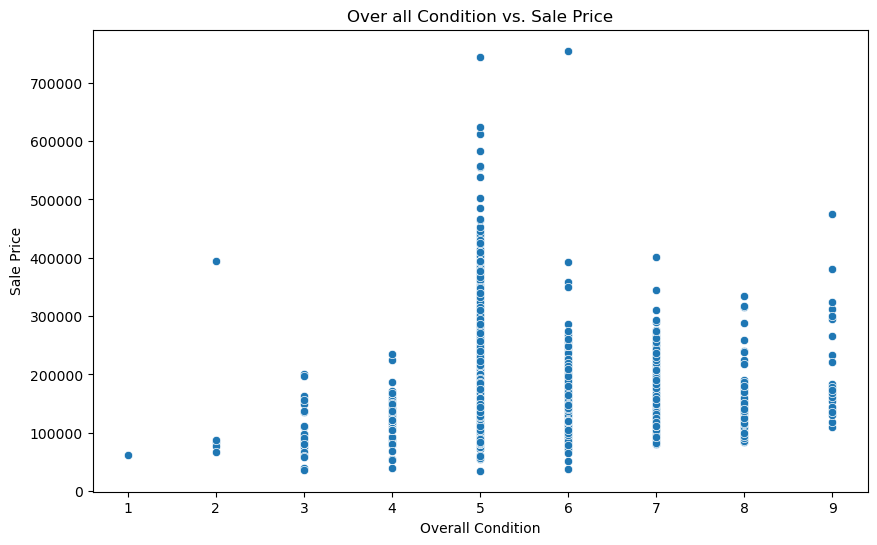

In [17]:
# Data Visualization 
# 1. Scatter Plot Over all condition vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Over all Condition', y='Sale Price', data=data) 
plt.title('Over all Condition vs. Sale Price') 
plt.xlabel('Overall Condition') 
plt.ylabel('Sale Price') 
plt.show()


<Axes: >

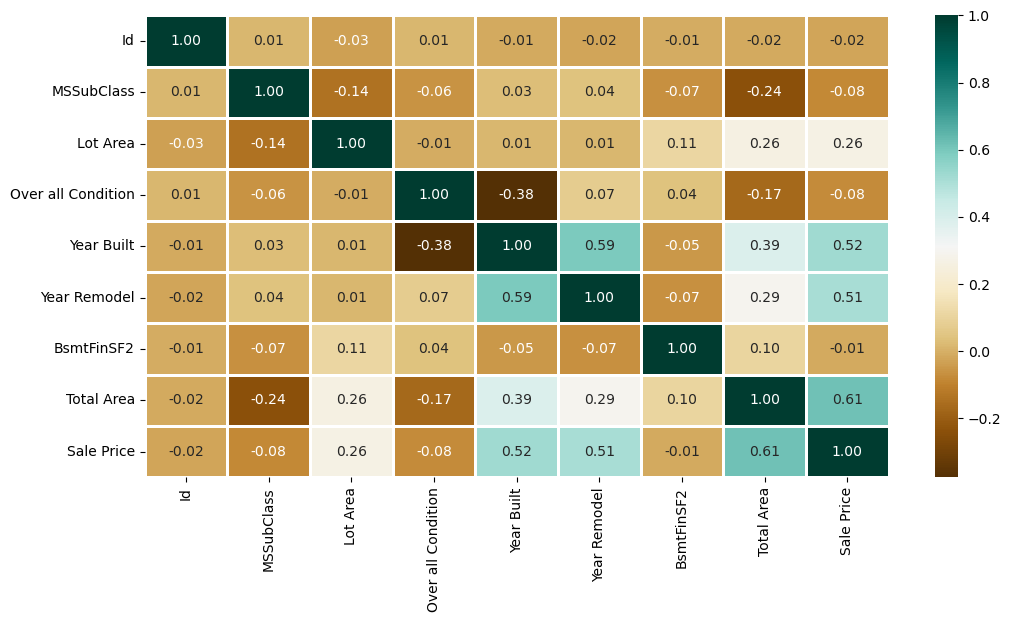

In [18]:
# 2. Select only numerical features for correlation analysis
numerical_dataset = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [19]:
data.columns

Index(['Id', 'MSSubClass', 'Zoning', 'Lot Area', 'LotConfig', 'Building Type',
       'Over all Condition', 'Year Built', 'Year Remodel', 'Exterior1st',
       'BsmtFinSF2', 'Total Area', 'Sale Price'],
      dtype='object')

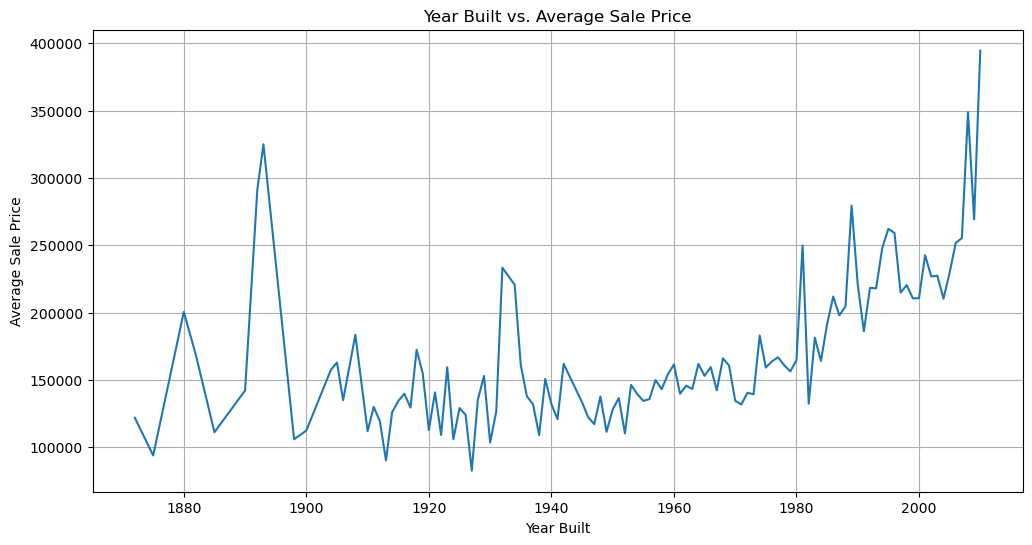

In [20]:
# 3. Line plot of Year Built vs. Average Sale Price
avg_price_per_year = data.groupby('Year Built')['Sale Price'].mean().reset_index()
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Year Built', y='Sale Price', data=avg_price_per_year)
plt.title('Year Built vs. Average Sale Price') 
plt.xlabel('Year Built'),
plt.ylabel('Average Sale Price')
plt.grid(True) 
plt.show()

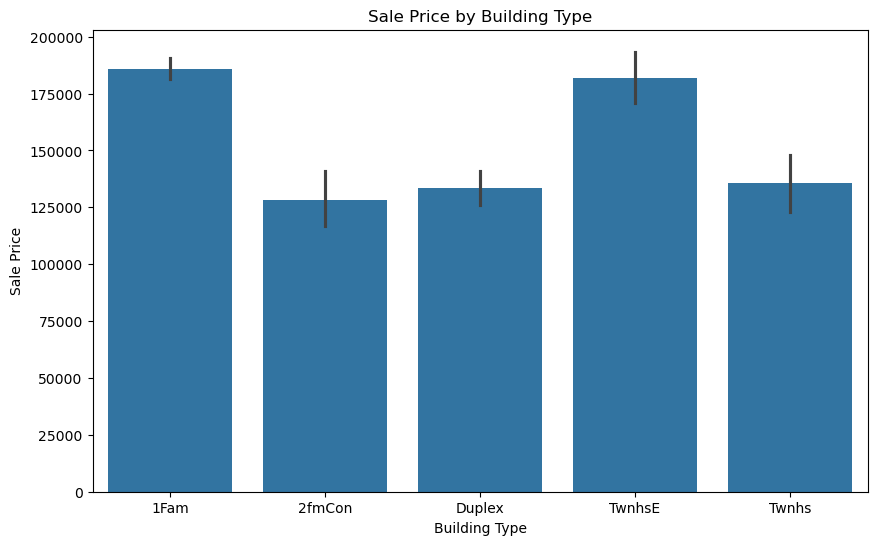

In [21]:
# 4. Bar plot of Sale Price by Building Type 
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Building Type', y='Sale Price', data=data) 
plt.title('Sale Price by Building Type')
plt.xlabel('Building Type') 
plt.ylabel('Sale Price')
plt.show()

# Machine Learning Model 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
# Encode categorical features (One-Hot Encoding)
data = pd.get_dummies(data, columns=['Zoning', 'LotConfig', 'Building Type', 'Exterior1st'], drop_first=True)

In [25]:
# Split data into features (X) and target (y)
X = data.drop(columns=['Sale Price', 'Id'])
y = data['Sale Price'].dropna()

In [26]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Step 2: Model Training and Evaluation
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make predictions
y_pred = model.predict(X_test)


In [30]:
# Step 3: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 23100.147537508157
Mean Squared Error (MSE): 1409172375.6408627
Root Mean Squared Error (RMSE): 37538.944785926826
